<a href="https://colab.research.google.com/github/davidashirov/fast-ai-course/blob/main/Cat_breeds_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working pet classifier

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from fastcore.all import *

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat='(.+)_\d+.jpg', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))
learn = vision_learner(dls, models.resnet50, metrics=accuracy)
learn.fine_tune(7)
learn.path = Path('.')
learn.export()

# Disfunctional Cat classifier

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.vision.widgets import *
from fastai.vision import *
from pathlib import Path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00


Import the Pets dataset and check the files to learn how to extract classes:

In [ ]:
path = untar_data(url=URLs.PETS)
files = get_image_files(path/"images")
print(len(files))
print(*files[0:5],sep='\n')

7390
/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_140.jpg
/root/.fastai/data/oxford-iiit-pet/images/samoyed_41.jpg
/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_69.jpg
/root/.fastai/data/oxford-iiit-pet/images/Sphynx_73.jpg
/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_68.jpg


I love cats, so we will classify cats only. Dog filenames begin with lowercase, cat filenames with uppercase. I wonder if the choice is arbitrary or authors are cat people too :).
Anyway, dog files should be removed by path.unlink

In [ ]:
def remove_dogs(files):
  files_updated = []
  for file in files:
    if file.stem[0].islower():
      file.unlink(missing_ok=True)
    else:
      files_updated.append(file)
  return(files_updated)

files_updated = remove_dogs(files)

print(len(files))
print(*files_updated[0:5],sep='\n')

7390
/root/.fastai/data/oxford-iiit-pet/images/Sphynx_73.jpg
/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_68.jpg
/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_40.jpg
/root/.fastai/data/oxford-iiit-pet/images/Persian_255.jpg
/root/.fastai/data/oxford-iiit-pet/images/Bengal_1.jpg


Extract image label by getting filename, removing number and replacing underscores with spaces.
After that it's nice to check how much classes there are and how many images each class has.

In [ ]:
def label(x):
  l = ' '.join(x.stem.rsplit('_')[:-1] )
  return l

labels = list(map(label, files_updated))
# Print number of images in each category
[print(x, ': ', labels.count(x)) for x in set(labels)]

British Shorthair :  200
Sphynx :  200
Egyptian Mau :  200
Ragdoll :  200
Maine Coon :  200
Birman :  200
Bengal :  200
Russian Blue :  200
Siamese :  200
Bombay :  200
Persian :  200
Abyssinian :  200


[None, None, None, None, None, None, None, None, None, None, None, None]

Create a DataBlock and get a summary, go through the steps that fast ai makes to prepare the data:
- split into train and valid 80:20
- creating labels, vocabulary of labels (text and number)
- resize to 224x224 from 500x333


Setting-up type transforms pipelines
Found 2400 items
2 datasets of sizes 1920,480
Setting up Pipeline: PILBase.create
Setting up Pipeline: label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Birman_52.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Birman_52.jpg
    applying label gives
      Birman
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(2))


Found 2400 items
2 datasets of sizes 1920,480
Setting up Pipeline: PILBase.create
Setting up Pipeline: label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'

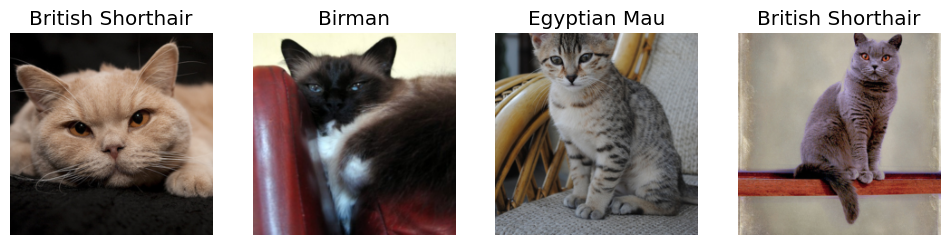

In [ ]:
pets_db = DataBlock(blocks=[ImageBlock,CategoryBlock],
                    get_items=get_image_files,
                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=label,
                    item_tfms=Resize(224,method='crop')
                    )
pets_db.summary(path/"images",show_batch=True, nrows=1)

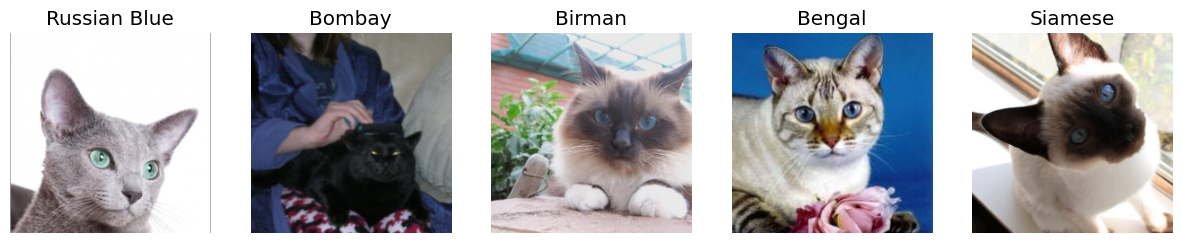

In [ ]:
pets_dls = pets_db.dataloaders(path/"images")
pets_dls.train.show_batch(max_n=5, nrows=1)

In [ ]:
model_file = Path('cats_breeds.pkl')
if not model_file.exists():
  learn = vision_learner(pets_dls, resnet34, metrics=error_rate)
  learn.fine_tune(10)
  learn.export('cats_breeds.pkl')
else:
  learn = load_learner('cats_breeds.pkl')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 213MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.961791,0.380006,0.133333,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.491110,0.282314,0.112500,00:17
1,0.349564,0.272026,0.095833,00:17
2,0.238146,0.283707,0.085417,00:18
3,0.176787,0.290724,0.083333,00:18
4,0.122890,0.336436,0.089583,00:17
5,0.086088,0.240722,0.062500,00:17
6,0.061939,0.274008,0.081250,00:17
7,0.042041,0.269664,0.075000,00:17
8,0.031341,0.265130,0.077083,00:17
9,0.024909,0.268445,0.079167,00:18


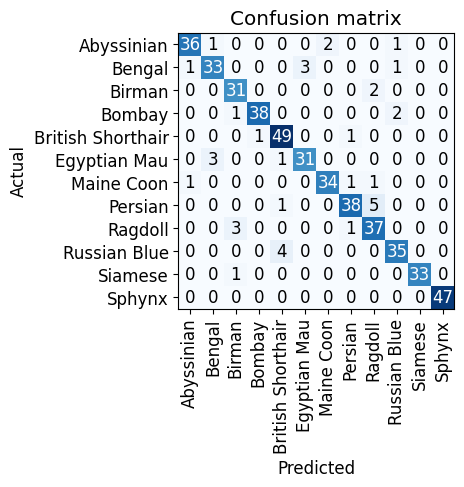

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

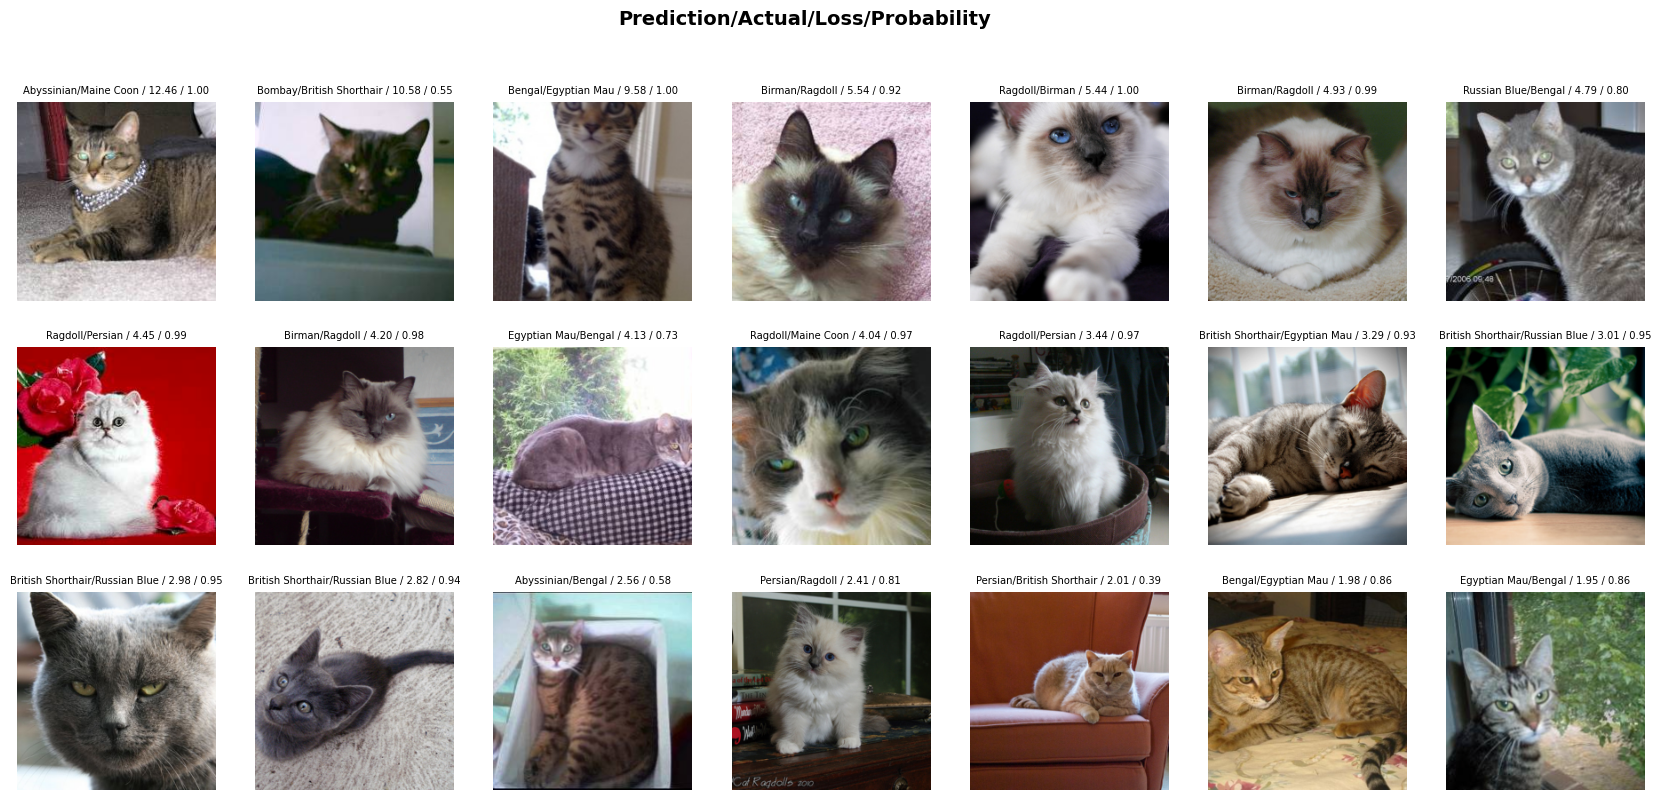

In [ ]:
matplotlib.rc('font', size=6)
interp.plot_top_losses(21, nrows=3)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.export('cats_breeds.pkl')
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('cats_breeds.pkl')]

In [ ]:
learn.dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Egyptian Mau', 'Maine Coon', 'Persian', 'Ragdoll', 'Russian Blue', 'Siamese', 'Sphynx']

In [ ]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
example_cats = {"russian_blue": "https://www.rover.com/blog/wp-content/uploads/2019/05/cat-3666983_1920-960x540.jpg",
                "ragdoll": "https://publish.purewow.net/wp-content/uploads/sites/2/2022/12/Long-Haired-Cat-Breeds-Ragdoll.jpg?fit=1360%2C800",
                "maine_coon": "https://hips.hearstapps.com/hmg-prod/images/large-cat-breed-maine-coon-1553270773.jpg"}
for cat_breed in example_cats:
    download_url(example_cats[cat_breed], f'{cat_breed}.jpg')
    prediction = predict(f'{cat_breed}.jpg')
    print(f'{max(prediction, key=prediction.get)}: {max(prediction)}')

Russian Blue: Sphynx


Ragdoll: Sphynx


Maine Coon: Sphynx


In [ ]:
!pip install gradio -q
import gradio as gr

learn_inf = load_learner('cats_breeds.pkl')
labels = learn_inf.dls.vocab

def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn_inf.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


app = gr.Interface(fn=predict,
             inputs=gr.inputs.Image(shape=(512, 512)),
             outputs=gr.outputs.Label(num_top_classes=3),
             title="Cat Breed Classifier",
             description="",
             article="<p style='text-align: center'><a href='https://www.google.com' target='_blank'>Google</a></p>",
             examples=['russian_blue.jpg','maine_coon.jpg','ragdoll.jpg'],
             interpretation='default',
             enable_queue=True)
app.launch()

<ipython-input-23-18b970634d08>:15: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(shape=(512, 512)),
<ipython-input-23-18b970634d08>:15: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(shape=(512, 512)),
<ipython-input-23-18b970634d08>:16: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Label(num_top_classes=3),
<ipython-input-23-18b970634d08>:16: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  outputs=gr.outputs.Label(num_top_classes=3),
<ipython-input-23-18b970634d08>:14: GradioDeprecationWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  app = gr.Interfac

{'Abyssinian': 7.338616683227883e-07, 'Bengal': 2.9311664206943533e-08, 'Birman': 5.6560711669817465e-09, 'Bombay': 6.389742566170753e-07, 'British Shorthair': 1.8871909901463368e-07, 'Egyptian Mau': 2.376981910856557e-06, 'Maine Coon': 7.498055509813639e-08, 'Persian': 8.566212628124958e-09, 'Ragdoll': 6.776448913115019e-08, 'Russian Blue': 0.9999955892562866, 'Siamese': 1.714519299866879e-07, 'Sphynx': 1.954411885662921e-07}
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>